In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import maximum_filter
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.stats import chisquare


In [2]:
im = Image.open("data1.jpg")
im_bw = im.convert(mode="L") 

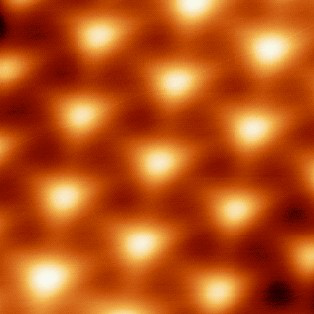

In [3]:
im

In [4]:
################### Pixel conversions and lengths ###########

# 8nm = 62 pixels
# 1nm = 7.75 pixels
# entire x and y axis length: 314 pixels
# entire x and y axis: 40.5161
# to get axis in nm scale, divide by 7.75

pixel_to_nm_conversion = 7.75

In [5]:
im_dat = im_bw.getdata() 
width, height = im_dat.size[0], im_dat.size[1]
im_dat = np.array(im_dat)
im_dat = im_dat.reshape(height, width)

-0.5 pixels -> -0.06451612903225806 nm
313.5 pixels -> 40.45161290322581 nm
313.5 pixels -> 40.45161290322581 nm
-0.5 pixels -> -0.06451612903225806 nm


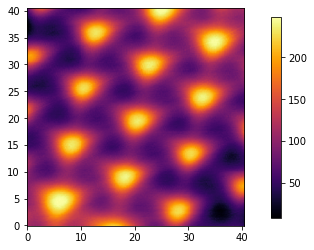

In [6]:
plt.figure() # Creating the figure
img = plt.imshow(im_dat, cmap = "inferno", vmin=np.min(im_dat), vmax=np.max(im_dat))
clb = plt.colorbar(img, fraction=0.03, pad=0.08) 


##################### Sample Scaling ############## 

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# extentfloats (left, right, bottom, top)

left = xmin / pixel_to_nm_conversion
right = xmax / pixel_to_nm_conversion
bottom = ymax / pixel_to_nm_conversion
top = ymin / pixel_to_nm_conversion

print(str(xmin),"pixels", "->", left,"nm")
print(str(xmax),"pixels", "->", right,"nm")
print(str(ymin),"pixels", "->", top,"nm")
print(str(ymax),"pixels", "->", bottom,"nm")


img = plt.imshow(im_dat, cmap = "inferno",extent = (left, right, bottom, top), vmin=np.min(im_dat), vmax=np.max(im_dat))

plt.show() 



In [7]:
# scale_factor = 5

# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()

# plt.xlim(xmin * scale_factor, xmax * scale_factor)
# plt.ylim(ymin * scale_factor, ymax * scale_factor)

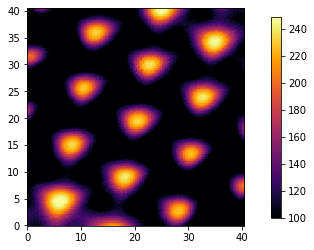

In [8]:
plt.figure() # Creating the figure
img_lim = plt.imshow(im_dat, interpolation = "nearest", cmap = "inferno",extent = (left, right, bottom, top),vmin = 100.0, vmax= np.max(im_dat))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [9]:
def threshold(image_array, thresh_val):
    
    shape = image_array.shape
    
    num_rows = shape[0]
    num_cols = shape[1]

    for j in range(num_cols):
       for i in range(num_rows):
         if image_array[i,j] < thresh_val:
           image_array[i,j] = 0

    return image_array


In [10]:
def data_plotter(dat_array):
  plt.figure() # Creating the figure
  img_lim = plt.imshow(dat_array, interpolation = "nearest",extent = (left, right, bottom, top), cmap = "inferno",vmin = np.min(dat_array), vmax=np.max(dat_array))
  clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
  plt.show() 

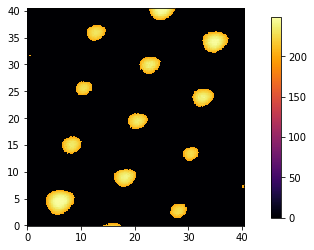

In [11]:
im_threshed = threshold(im_dat,200)
data_plotter(im_threshed)

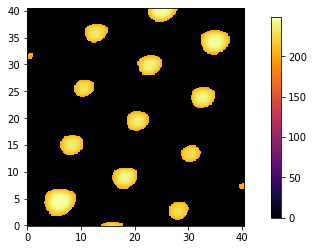

In [12]:
temp_im = list(maximum_filter(im_threshed, size=(5,5)))
data_plotter(temp_im)

In [13]:
########################### find peaks of lattice sites #################

shape_dat = im_dat.shape
    
num_rows_dat = shape_dat[0]
num_cols_dat = shape_dat[1]

temp_im_arr = np.asarray(temp_im).reshape(num_rows_dat,num_cols_dat)

row_arr = []
col_arr = []

for rows in range(num_rows_dat):
    for col in range(num_cols_dat):
        if (temp_im_arr[rows,col] == im_threshed[rows,col] and temp_im_arr[rows,col] != 0 and temp_im_arr[rows,col] > 225):
            row_arr.append(rows)
            col_arr.append(col)


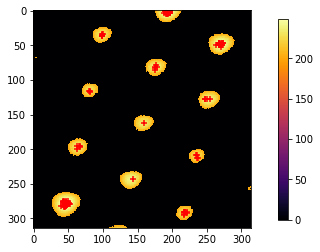

In [14]:
plt.figure() # Creating the figure
plt.scatter(col_arr,row_arr,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [15]:
x_point_all = []
y_point_all = []

# This loop makes sure that points that are closer than 20 units in both x and y values are isolated so
# we have one point corresponding to each lattice 

for i in range(len(row_arr)):
    if(i != len(row_arr)-1):
        if(row_arr[i+1] - row_arr[i] > 20 or col_arr[i+1] - col_arr[i] > 20):
#             print(row_arr[i],col_arr[i])
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            x_point_all.append(row_arr[i+1])
            y_point_all.append(col_arr[i+1])
    if(i == len(row_arr)):
        if(row_arr[i] - row_arr[0] > 20 or col_arr[i] - col_arr[0] > 20):
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            


############# lattice sites #################
99.0 35.5
269.0 49.5
175.5 82.0
80.5 116.5
251.0 127.5
160.0 162.0
63.0 197.0
236.0 210.5
143.0 243.0
44.0 279.0


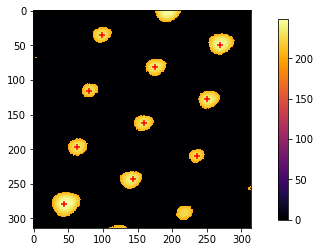

In [16]:
############################## Average the peak points of each lattice together and return single point ############
single_centers_x = []
single_centers_y = []


for i in range(len(y_point_all)):
    if(i != len(y_point_all)-1):
        if(x_point_all[i+1] - x_point_all[i] < 20 and y_point_all[i+1] - y_point_all[i] < 20):
            single_centers_x.append( (x_point_all[i]+x_point_all[i+1]) /2) 
            single_centers_y.append( (y_point_all[i]+y_point_all[i+1]) /2)
#             single_centers_x.append(x_point_all[i+1])
#             single_centers_y.append(y_point_all[i+1])
    if(i == len(y_point_all)):
        if(x_point_all[i] - x_point_all[0] < 20 and y_point_all[i] - y_point_all[0] < 20):
            single_centers_x.append( (x_point_all[i]+x_point_all[0]) / 2)
            single_centers_y.append( (y_point_all[i]+y_point_all[0]) / 2)
#             single_centers_x.append(x_point_all[0])
#             single_centers_y.append(y_point_all[0])
            
            
print("############# lattice sites #################")

for i in range(len(single_centers_y)):
    print(single_centers_y[i],single_centers_x[i])
  
plt.figure() # Creating the figure
plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [17]:
# ############### Set origin and draw sample a1 and a2 vector ################

# O = np.array( [ single_centers_y[-1] , single_centers_x[-1] ] )
# a1 = np.array([ single_centers_y[-2] , single_centers_x[-2] ] )
# a2 = np.array([ single_centers_y[-4] , single_centers_x[-4] ] )

# a1_vec = a1 - O
# a2_vec = a2 - O

# print(a1_vec)
# print(a2_vec)

# Oa1x = [ O[0], a1[0] ] 
# Oa1y = [ O[1], a1[1] ]

# Oa2x = [ O[0], a2[0] ] 
# Oa2y = [ O[1], a2[1] ]


# plt.plot(Oa1x,Oa1y, color = "b", label = "a1")
# plt.plot(Oa2x,Oa2y, color = "b", label = "a2")

# plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
# img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
# clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08)
# plt.legend()
# plt.show() 

In [18]:
######################## Isolate specific (center in this case) hexagonal lattice #####################
        
# filter_col = []
# filter_row = []

# for i in range(len(single_centers_y)):
#     if( 60 < single_centers_x[i] < 250 and  50 < single_centers_y[i] < 260):
#         filter_row.append(single_centers_x[i])
#         filter_col.append(single_centers_y[i])
        
# plt.figure() # Creating the figure
# plt.scatter(filter_col,filter_row,c='r', marker = "+")
# img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
# clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
# plt.show() 



############# This piece of code draws a nice hexagonal lattice area ############

# # modif_y = [61,81,142,160,175,237,251]
# # modif_x = [195,116,242,162,85,212,127]

# modif_y = [61,81,175,251,237,142,61]
# modif_x = [195,116,85,127,212,242,195]

# plt.figure() # Creating the figure
# plt.plot(modif_y,modif_x,c='r', marker = "+")
# img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
# clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
# plt.show() 


######### x & y coordinates of each moire super lattice ########
99.0 35.5
269.0 49.5
175.5 82.0
80.5 116.5
251.0 127.5
160.0 162.0
63.0 197.0
236.0 210.5
143.0 243.0
44.0 279.0


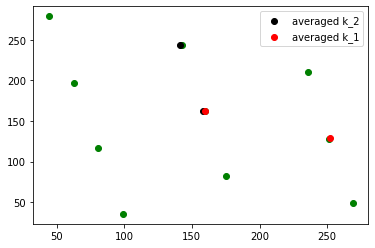

[141.0, 244.16666666666666]
[158.0, 162.16666666666666]
[252.0, 129.16666666666666]
[159.5, 162.33333333333334]


In [19]:
print("######### x & y coordinates of each moire super lattice ########")
for i in range(len(single_centers_y)):
    print(single_centers_y[i],single_centers_x[i])
  

v_int = [ [0,100] , [100,200], [200, 400] ]
h_int = [ [40,120] , [120,200], [200, 400] ]


def averaging_function(data_x, data_y, vertical_intervals, horizontal_intervals):

    plt.scatter(data_x,data_y, c = "g")

    ############## vertical stuff ############

    data_x_sorted_ind = np.argsort(data_x)

    left_points = []
    middle_points = []
    right_point = []

    for i in range(len(data_x)):

        # if( abs( data_y[int(data_x_sorted_ind[i])] - data_y[int(data_x_sorted_ind[i+1])] ) >  100 and (0 <data_x[int(data_x_sorted_ind[i])] < 100) ):
        if( (v_int[0][0] <data_x[int(data_x_sorted_ind[i])] < v_int[0][1]) ):
            left_points.append( [data_x[int(data_x_sorted_ind[i])], data_y[int(data_x_sorted_ind[i])] ])

        # if( abs( data_y[int(data_x_sorted_ind[i])] - data_y[int(data_x_sorted_ind[i+1])] ) >  100):
        if( (v_int[1][0] <data_x[int(data_x_sorted_ind[i])] < v_int[1][1]) ):
            middle_points.append( [data_x[int(data_x_sorted_ind[i])], data_y[int(data_x_sorted_ind[i])] ])

        if( ( data_x[int(data_x_sorted_ind[i])] > v_int[2][0]) ):
            right_point.append( [data_x[int(data_x_sorted_ind[i])], data_y[int(data_x_sorted_ind[i])] ])


    # plt.scatter(left_points_x,left_points_y)
    # print(left_points)
    # print(left_points[0][1])
    # print(left_points[1][0])

    # print(middle_points)


    # for j in range(len(middle_points)):
    # 	print(left_points[j][0],left_points[j][1])
    # 	plt.scatter(left_points[j][0],left_points[j][1], c = 'r')
    # 	plt.scatter(middle_points[j][0],middle_points[j][1], c = 'g')
    # 	plt.scatter(right_point[j][0],right_point[j][1], c = 'b')

    # plt.show()


    def averaging(left, middle, right):

        avg_p1_x = ( left[0][0] + middle[0][0] + right[0][0] ) / 3
        avg_p1_y = ( left[0][1] + middle[0][1] + right[0][1] ) /3

        avg_p1 = [avg_p1_x, avg_p1_y]

        avg_p2_x = ( left[1][0] + middle[1][0] + right[1][0] ) / 3
        avg_p2_y = ( left[1][1] + middle[1][1] + right[1][1] ) / 3

        avg_p2 = [avg_p2_x, avg_p2_y]

        return(avg_p1, avg_p2)


    p1 , p2 = averaging(left_points,middle_points, right_point)
    
    plt.scatter(p1[0],p1[1], color = "k", label ="averaged k_2")
    plt.scatter(p2[0],p2[1], color = "k")

    # plt.show()

    ######### horizontal stuff ###############

    data_y_sorted_ind = np.argsort(data_y)

    top_points = []
    center_points = []
    bottom_points = []

    for i in range(len(data_x)):

        # if( abs( data_y[int(data_x_sorted_ind[i])] - data_y[int(data_x_sorted_ind[i+1])] ) >  100 and (0 <data_x[int(data_x_sorted_ind[i])] < 100) ):
        if( (h_int[0][0] <data_y[int(data_y_sorted_ind[i])] < h_int[0][1] ) ):
            bottom_points.append( [data_x[int(data_y_sorted_ind[i])], data_y[int(data_y_sorted_ind[i])] ])

        # if( abs( data_y[int(data_x_sorted_ind[i])] - data_y[int(data_x_sorted_ind[i+1])] ) >  100):
        if( h_int[1][0]  <data_y[int(data_y_sorted_ind[i])] < h_int[1][1] ):
            center_points.append( [data_x[int(data_y_sorted_ind[i])], data_y[int(data_y_sorted_ind[i])] ])

        if(  data_y[int(data_y_sorted_ind[i])] > h_int[2][0] ):
            top_points.append( [data_x[int(data_y_sorted_ind[i])], data_y[int(data_y_sorted_ind[i])] ])



    # for j in range(len(top_points)):
    # 	# print(left_points[j][0],left_points[j][1])
    # 	plt.scatter(top_points[j][0],top_points[j][1], c = 'r')
    # 	plt.scatter(center_points[j][0],center_points[j][1], c = 'g')
    # 	plt.scatter(bottom_points[j][0],bottom_points[j][1], c = 'b')

    # plt.show()

    # print("##### top points #####")
    # print(top_points)
    # print("#######  center points #####" )
    # print(center_points)
    # print("#######  bottom points #####")
    # print(bottom_points)
    # plt.scatter(top_points[0][0],top_points[0][1], c = 'r')
    # plt.show()

    p3 , p4 = averaging(top_points,center_points, bottom_points)

    plt.scatter(p3[0],p3[1], color = "r", label = "averaged k_1")
    plt.scatter(p4[0],p4[1], color = "r")
   
    plt.legend()
    plt.show()

    return (p1,p2,p3,p4)


k_1_1, k_1_2, k_2_1, k_2_2 = averaging_function(single_centers_y,single_centers_x,v_int, h_int)

print(k_1_1)
print(k_1_2)
print(k_2_1)
print(k_2_2)


In [20]:
# This function takes three primitive vector a_1,a_2,a_3 which are calculated from the real space
# STM images. The primitive vectors are then fourier transformed in reciprocal/K-space/momentum space vector b1,b2,b3


def reciprocal_space_transform(a_1x, a_1y, a_2x, a_2y):
    
    # transformation from real space onto k-space 
    b_1x = (2*np.pi) * a_2y / ( (a_1x*a_2y) - (a_1y*a_2x) )
    b_1y = (2*np.pi) * (-1)*a_2x / ( (a_1x*a_2y) - (a_1y*a_2x) )

    b_2x = (2*np.pi) * (-1)*a_1y / ( (a_1x*a_2y) - (a_1y*a_2x) )
    b_2y = (2*np.pi) * a_1x / ( (a_1x*a_2y) - (a_1y*a_2x) )
    
    b1 = np.array([b_1x,b_1y])   
    b2 = np.array([b_2x,b_2y])
    
    # Defining b3 as superposition of b1 and b3 vectors
    b3_x = b1[0] - b2[0]
    b3_y = b1[1] - b2[1]
    
    b3 = np.array([b3_x,b3_y])
    
    return b1,b2,b3

In [21]:
################ Manually choosing points without averaging ######################

# O = np.array( [ single_centers_y[5] , single_centers_x[5] ] )

X = O[0]
Y = O[1]

O = np.array( [ single_centers_y[-5] , single_centers_x[-5] ] )
a1 = np.array( [ single_centers_y[-2] , single_centers_x[-2] ] )
a2 = np.array( [ single_centers_y[-4] , single_centers_x[-4] ] )

a1_vec = a1 -O
a2_vec = a2 - O


# a1_vec = a1 - Origin
# a2_vec = a2 - Origin

# Directional vectors
U = [a1_vec[0]]  
V = [a1_vec[1]]  

W = [a2_vec[0]]  
Z = [a2_vec[1]]  

T = [a3_vec[0]]
R = [a3_vec[1]]
  
# # Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, label = "a1")
plt.quiver(X, Y, W, Z, color='purple', units='xy', scale=1, label = "a2")
plt.quiver(X, Y, T, R, color='green', units='xy', scale=1, label = "a3")


UT = U[0] + T[0]
VR = V[0] + R[0]
plt.quiver(X, Y, UT, VR, color='magenta', units='xy', scale=1, label = "a1+a3")


plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
plt.scatter(X,Y,color = "g")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.gca().invert_yaxis()
plt.legend()


NameError: name 'O' is not defined

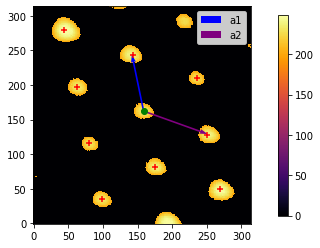

In [22]:
#################### With lattice point averaging #################

O =  ( np.array(k_1_2) + np.array(k_2_2) ) /2

X = O[0]
Y = O[1]

# O = np.array( [ single_centers_y[-5] , single_centers_x[-5] ] )
# a1 = np.array( [ single_centers_y[-2] , single_centers_x[-2] ] )
# a2 = np.array( [ single_centers_y[-4] , single_centers_x[-4] ] )

a1_vec = np.array(k_1_1) - np.array(k_1_2)
a2_vec = np.array(k_2_1) - np.array(k_2_2)


# Directional vectors
U = [a1_vec[0]]  
V = [a1_vec[1]]  

W = [a2_vec[0]]  
Z = [a2_vec[1]]  

  
# # Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, label = "a1")
plt.quiver(X, Y, W, Z, color='purple', units='xy', scale=1, label = "a2")


plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
plt.scatter(X,Y,color = "g")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.gca().invert_yaxis()
plt.legend()


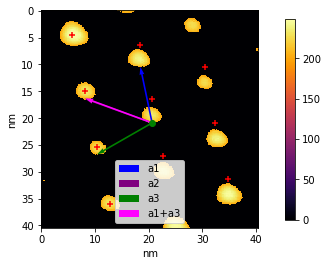

In [23]:
################ Conversion of axis to nm ################



# X = O[0] / 7.75
# Y = O[1] / 7.75

# single_y_nm = np.flip( np.asarray(single_centers_y) / 7.75)
single_x_nm = np.flip( np.asarray(single_centers_x) / 7.75)

single_y_nm = ( np.asarray(single_centers_y) / 7.75)
# single_x_nm = ( np.asarray(single_centers_x) / 7.75)


O = np.array( [ single_centers_y[-5] , single_centers_x[-5] ] ) / 7.75
a1 = np.array([ single_centers_y[-2] , single_centers_x[-2] ] ) / 7.75
a2 = np.array([ single_centers_y[-4] , single_centers_x[-4] ] ) / 7.75
a3 = np.array([ single_centers_y[3] , single_centers_x[3] ] ) / 7.75

a1_vec = (a1 - O)
a2_vec = (a2 - O)
a3_vec = (a3 - O) 


# a1_vec = a1 - Origin
# a2_vec = a2 - Origin

# Directional vectors
U = [a1_vec[0]] 
V = [a1_vec[1]]  

W = [a2_vec[0]]  
Z = [a2_vec[1]]  

T = [a3_vec[0]] 
R = [a3_vec[1]] 

X = O[0] 
Y = O[1] 
  
# # Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, label = "a1")
plt.quiver(X, Y, W, Z, color='purple', units='xy', scale=1, label = "a2")
plt.quiver(X, Y, T, R, color='green', units='xy', scale=1, label = "a3")


UT = U[0] + T[0]
VR = V[0] + R[0]
plt.quiver(X, Y, UT, VR, color='magenta', units='xy', scale=1, label = "a1+a3")

plt.scatter(X,Y,color = "g")
plt.scatter(single_y_nm,single_x_nm,c='r', marker = "+")

img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",extent = (left, right, bottom, top),vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) 
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()


plt.ylabel("nm")
plt.xlabel("nm")
plt.legend()


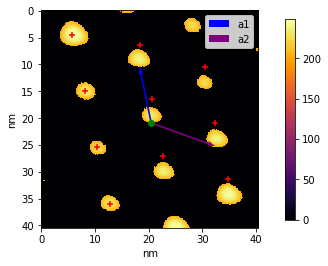

In [24]:
################ Conversion of axis to nm ################



# X = O[0] / 7.75
# Y = O[1] / 7.75

# single_y_nm = np.flip( np.asarray(single_centers_y) / 7.75)
single_x_nm = np.flip( np.asarray(single_centers_x) / 7.75)

single_y_nm = ( np.asarray(single_centers_y) / 7.75)
# single_x_nm = ( np.asarray(single_centers_x) / 7.75)


# O = np.array( [ single_centers_y[-5] , single_centers_x[-5] ] ) / 7.75
# a1 = np.array([ single_centers_y[-2] , single_centers_x[-2] ] ) / 7.75
# a2 = np.array([ single_centers_y[-4] , single_centers_x[-4] ] ) / 7.75
# a3 = np.array([ single_centers_y[3] , single_centers_x[3] ] ) / 7.75

O = ( ( np.array(k_1_2) + np.array(k_2_2) ) /2 ) / 7.75

X = O[0]
Y = O[1]

# O = np.array( [ single_centers_y[-5] , single_centers_x[-5] ] )
# a1 = np.array( [ single_centers_y[-2] , single_centers_x[-2] ] )
# a2 = np.array( [ single_centers_y[-4] , single_centers_x[-4] ] )

a1_vec =  ( np.array(k_1_1) - np.array(k_1_2) ) / 7.75
a2_vec =  ( np.array(k_2_1) - np.array(k_2_2) ) / 7.75



# a1_vec = a1 - Origin
# a2_vec = a2 - Origin

# Directional vectors
U = [a1_vec[0]] 
V = [a1_vec[1]]  

W = [a2_vec[0]]  
Z = [a2_vec[1]]  


# # Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, label = "a1")
plt.quiver(X, Y, W, Z, color='purple', units='xy', scale=1, label = "a2")


UT = U[0] + T[0]
VR = V[0] + R[0]
# plt.quiver(X, Y, UT, VR, color='magenta', units='xy', scale=1, label = "a1+a2")

plt.scatter(X,Y,color = "g")
plt.scatter(single_y_nm,single_x_nm,c='r', marker = "+")

img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",extent = (left, right, bottom, top),vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) 
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()


plt.ylabel("nm")
plt.xlabel("nm")
plt.legend()


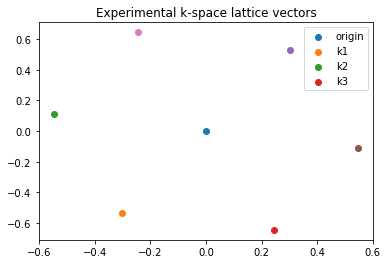

In [25]:

b1,b2,b3 = reciprocal_space_transform(a1_vec[0], -a1_vec[1], a3_vec[0], -a3_vec[1])
# The y-components of a-vectors need to be flipped since the rows in the image are numbered from top to bottom

plt.scatter(0,0,label = "origin")

plt.scatter(b1[0],b1[1],label = "k1")
plt.scatter(b2[0],b2[1],label = "k2")
plt.scatter(b3[0],b3[1],label = "k3")

plt.scatter(-b1[0],-b1[1])
plt.scatter(-b2[0],-b2[1])
plt.scatter(-b3[0],-b3[1])

# Defining new lattice vectors in k-space
# O_k = np.array([0,0])

# U_k = [b1[0]]  
# V_k = [b1[1]]  

# W_k = [b2[0]]  
# Z_k = [b2[1]]  

# T_k = [b3[0]]
# R_k = [b3[1]]

# plt.quiver(O_k[0], O_k[1], b1[0], b1[1], color='b', units='xy', scale=1, label = "k1")
# plt.quiver(O_k[0], O_k[1], b2[0], b2[1], color='purple', units='xy', scale=1, label = "k2")
# plt.quiver(O_k[0], O_k[1], b3[0], b3[1], color='green', units='xy', scale=1, label = "k3")

plt.title("Experimental k-space lattice vectors")
plt.legend()
plt.show()


In [26]:
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################

In [27]:
################ This function rotates a certain point by a certain origin by a specified angle #######
####### from: https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python #######

import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [28]:
################ This function simulates the twisted graphene lattice structure in 2D k-space ####################

########## Inputs: ##########
# alpha : lattice constant (0.246 nm for Graphene)
# sigma : poisson ratio of material (0.16 for Graphene)
# epsilon : strain percentage
# theta_s : applied strain angle
# theta_t : Graphene stack twist angle
# theta_g : taking initial STM orientation into account by rotating all points 

########### Outputs: ##########
# 2 n-length lists corresponding to list of x value and y value coordinates for 3 simulated lattice vectos

def test_sim(alpha, sigma, epsilon, theta_s,theta_t, theta_g):
    
    origin = [0,0]
    a_0 = alpha
    #a_0 = 0.246 * (10**(-9)) #meters
    k = 4*(np.pi) / ( np.sqrt(3) * a_0)
    
    ################# define some essential and simple functions ###########
    
    def deg_to_rad(degree):
        return degree * np.pi/180
    
    def rot_matrix(angle): # angle should be in rads
        ret_mat = np.array([[np.cos(angle),(-1)*np.sin(angle)],[np.sin(angle),np.cos(angle)]])
        return ret_mat

    ################ Define k-space lattice sites #############

    k_1 = np.array([1,0]) * k
    k_1 = k_1.reshape(2,1)


    k_2 = np.array([np.cos(deg_to_rad(60)), np.sin(deg_to_rad(60))]) * k
    k_2 = k_2.reshape(2,1)

    k_3 = np.array([np.cos(deg_to_rad(120)), np.sin(deg_to_rad(120))]) * k
    k_3 = k_3.reshape(2,1)
    
    k_x_vals = [k_1[0],k_2[0],k_3[0],-k_1[0],-k_2[0],-k_3[0]]
    k_y_vals = [k_1[1],k_2[1],k_3[1],-k_1[1],-k_2[1],-k_3[1]]
    
    ################ k prime defintions #############
    
    theta_twist = theta_t
    theta_twist_rad = deg_to_rad(theta_twist)
    rotation_matrix = np.array([[np.cos(theta_twist_rad),(-1)*np.sin(theta_twist_rad)],[np.sin(theta_twist_rad),np.cos(theta_twist_rad)]])

    # rotation_matrix

    k_1_prime = np.matmul(rotation_matrix,k_1)


    k_2_prime= np.matmul(rotation_matrix,k_2)


    k_3_prime= np.matmul(rotation_matrix,k_3)
    
    origin = [0,0]
 
    k_prime_x_vals = [k_1_prime[0],k_2_prime[0],k_3_prime[0],-k_1_prime[0],-k_2_prime[0],-k_3_prime[0]]
    k_prime_y_vals = [k_1_prime[1],k_2_prime[1],k_3_prime[1],-k_1_prime[1],-k_2_prime[1],-k_3_prime[1]]
    
    ################# define moire wavelengths ##############
    
    K_1 = k_1_prime - k_1

    K_2 = k_2_prime - k_2

    K_3 = k_3_prime - k_3
    
    ################ define strain matrix and strain wave vectors ###########

    E_matrix = np.array([[1/(1+epsilon), 0],[0, 1/(1-(sigma*epsilon))]])
    
    S_matrix = rot_matrix(-deg_to_rad(theta_s)) @ E_matrix @ rot_matrix(deg_to_rad(theta_s))
    # Several corrections:
    # 1) The inputs of rot_matrix should be in rads;
    # 2) The first matrix is the inverse/transpose of the last matrix. Due to the structure of the rotational matrix it can be achieved by theta_s -> -theta_s;
    # 3) Matrix multiplication operator "@" should be used instead of element-wise multiplication "*"
    
    k_1s = np.matmul(S_matrix, k_1)

    k_2s = np.matmul(S_matrix, k_2)

    k_3s = np.matmul(S_matrix, k_3)
    
    k_xs_vals = [k_1s[0],k_2s[0],k_3s[0],-k_1s[0],-k_2s[0],-k_3s[0]]
    k_ys_vals = [k_1s[1],k_2s[1],k_3s[1],-k_1s[1],-k_2s[1],-k_3s[1]]

    K_1s = k_1_prime - k_1s

    K_2s = k_2_prime - k_2s

    K_3s = k_3_prime - k_3s
    
    K_xs_vals = [K_1s[0],K_2s[0],K_3s[0],-K_1s[0],-K_2s[0],-K_3s[0]]
    K_ys_vals = [K_1s[1],K_2s[1],K_3s[1],-K_1s[1],-K_2s[1],-K_3s[1]]
    rotate_x_points = []
    rotate_y_points = []

    for i in range(len(K_xs_vals)): # correction: the overall rotation should be applied to "K" instead of "k" vectors!
        point = [K_xs_vals[i][0],K_ys_vals[i][0]] # K_xs_vals[i][0] is a number instead of an 1*1 array
        new_x, new_y = rotate(origin,point, deg_to_rad(theta_g)) # the angle of function "rotate" should be in rads
        rotate_x_points.append(new_x)
        rotate_y_points.append(new_y)
       
    
    ####################### plot k and k prime points with and without strain ################
    
#     plt.scatter(k_prime_x_vals,k_prime_y_vals,color = "red", label = "twisted lattice")
#     plt.scatter(k_x_vals,k_y_vals,color = "blue", label = "primary lattice")
#     plt.scatter(origin[0],origin[1],color = "green", label = "origin")


    ############# Main Plot #############
#     plt.title("Simulated k-space lattice vectors")
#     for i in range(1,len(k_xs_vals)+1):
        
#         labell = "k"+str(i)+"lattice w/strain"
#         plt.scatter(rotate_x_points[i-1],rotate_y_points[i-1], label = labell)
#         plt.legend()
#     plt.show()
    
    
    
#     plt.scatter(k_x_vals,k_y_vals,color = "blue")
#     plt.scatter(origin[0],origin[1],color = "green")
    return rotate_x_points,rotate_y_points 

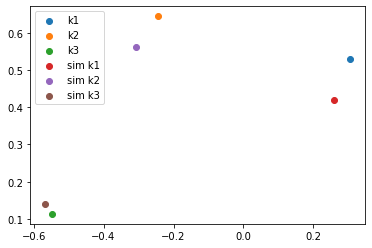

In [29]:

from scipy.stats import chisquare
from scipy.optimize import curve_fit



a,b = test_sim(alpha = 0.246, sigma = 0.16, epsilon = 0.005, theta_s = 60, theta_t = 1.1, theta_g = -30)
# For test parameters: typical strain (epsilon) is usually smaller than 1%; the original value 5% is too large; twist angle is around 1 degree.

# plt.scatter(test_k1[0],test_k1[1],label = "sim k1")
# plt.scatter(test_k2[0],test_k2[1],label = "sim k2")
# plt.scatter(test_k3[0],test_k3[1],label = "sim k3")
# plt.legend()


plt.scatter(-b1[0],-b1[1],label = "k1")
plt.scatter(-b3[0],-b3[1],label = "k2")
plt.scatter(b2[0],b2[1],label = "k3")
plt.legend()
# definitions of k1, k2 and k3 are changed so as to match simulated k-values


plt.scatter(a[0],b[0],label = "sim k1")
plt.scatter(a[1],b[1],label = "sim k2")
plt.scatter(a[2],b[2],label = "sim k3")
# plt.scatter(-a[0],-b[0],label = "sim -k1")
# plt.scatter(-a[1],-b[1],label = "sim -k2")
# plt.scatter(-a[2],-b[2],label = "sim -k3")
plt.legend()




In [30]:
# pointk1_sim = np.array([a[0],b[0]])
# pointk1_exp = np.array([-b2[0],-b2[1]])

# print(pointk1_sim)
# print(pointk1_exp)



# pointk2_sim = np.array([a[1],b[1]])
# pointk2_exp = np.array([b3[0],b3[1]])

# print(pointk2_sim)
# print(pointk2_exp)


# pointk3_sim = np.array([a[2],b[2]])
# pointk3_exp = np.array([b1[0],b1[1]])


# print(pointk3_sim)
# print(pointk3_exp)


# plt.scatter(a[0],b[0],label = "sim k1")
# plt.scatter(-b2[0],-b2[1],label = "exp k1")
# plt.legend()


# plt.show()

# plt.scatter(a[1],b[1],label = "sim k2")
# plt.scatter(b3[0],b3[1],label = "exp k2")
# plt.legend()

# plt.show()

# plt.scatter(a[2],b[2],label = "sim k3")
# plt.scatter(b1[0],b1[1],label = "exp k3")
# plt.legend()



In [31]:
# f_obs_x = np.array([-b2[0], b3[0], b1[0]])
# f_exp_x = np.array([a[0],a[1],a[2]])

# f_obs_y = np.array([-b2[1], b3[1], b1[1]])
# f_exp_y = np.array([b[0],b[1],b[2]])



# print(f_obs_y,f_obs_x)
# print("###############")
# print(f_exp_y,f_exp_x)


# chisqy,py = chisquare(f_obs_y,f_exp_y)
# chisqx,px = chisquare(f_obs_x,f_exp_x)

# print(chisqy)
# print(chisqx)

In [32]:
exp_dat = np.array([ [-b1[0],-b1[1]] , [-b3[0],-b3[1]], [b2[0],b2[1]] ])
test_param = [0.005,60,1.1,-30]
fixed_param = [0.246, 0.16] # these should be fixed instead of optimized!

In [33]:
def my_least_squared(a_parameters, a_fixed):  #, a_experimentalPoints):

    a_experimentalPoints = np.array([ [-b1[0],-b1[1]] , [-b3[0],-b3[1]], [b2[0],b2[1]] ])
    a_experimentalPoints_x = np.array([-b1[0],-b3[0],b2[0]])
    a_experimentalPoints_y = np.array([-b1[1],-b3[1],b2[1]])

# simPoints are determined by both fixed parameters (alpha, sigma) and variable ones (epsilon, theta_s, theta_t, theta_g)
    totSimPointsx,totSimPointsy = test_sim(a_fixed[0], a_fixed[1], a_parameters[0], a_parameters[1],a_parameters[2],a_parameters[3])
#     simPoint1 = [simPointsx[0],simPointsy[0]]
#     simPoint2 = [simPointsx[1],simPointsy[1]]
#     simPoint3 = [simPointsx[2],simPointsy[2]]
    
    simPointsx = np.asarray(totSimPointsx[:3])
    simPointsy = np.asarray(totSimPointsy[:3])

#     print(a_experimentalPoints_x)
#     print(simPointsx)
#     simulatedPoints = np.array([ simPoint1, simPoint2, simPoint3])
    

#     chiSquared = np.sum( (a_experimentalPoints - simulatedPoints)**2 / simulatedPoints )
#     my_least_sq = np.sum( (a_experimentalPoints_x - simPointsx) * (a_experimentalPoints_y - simPointsy)  ) / np.sum( (a_experimentalPoints_x - simPointsx)**2 )
    my_least_sq = np.sum( (a_experimentalPoints_x - simPointsx)**2 + (a_experimentalPoints_y - simPointsy)**2 ) 
# For least squared minimization we can just add the squares of each distance together: the calculation is easier without doing the extra square root!

    one = (np.sqrt( (a_experimentalPoints_x[0] - simPointsx[0])**2 + (a_experimentalPoints_y[0] - simPointsy[0])**2 ))
    two = (np.sqrt( (a_experimentalPoints_x[1] - simPointsx[1])**2 + (a_experimentalPoints_y[1] - simPointsy[1])**2 ))
    three = (np.sqrt( (a_experimentalPoints_x[2] - simPointsx[2])**2 + (a_experimentalPoints_y[2] - simPointsy[2])**2 ))
    
#     print(one+two+three,"manual sum")
    
    return my_least_sq
#    return one+two+three

In [34]:
# program_sum = my_least_squared(test_param)
# print(program_sum,"program sum")


res = minimize(my_least_squared, test_param, fixed_param)
opt_param = res.x
print(res.message)
print(res.x)

Optimization terminated successfully.
[ 4.48476478e-03  8.83010132e+01  1.19593757e+00 -3.23576421e+01]


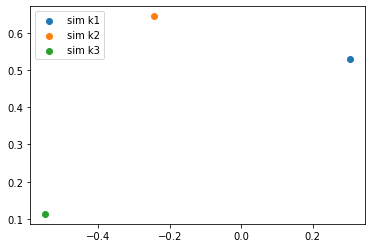

In [35]:
opt_x,opt_y = test_sim(fixed_param[0],fixed_param[1],opt_param[0],opt_param[1],opt_param[2],opt_param[3])
plt.scatter(opt_x[0],opt_y[0],label = "sim k1")
plt.scatter(opt_x[1],opt_y[1],label = "sim k2")
plt.scatter(opt_x[2],opt_y[2],label = "sim k3")
# plt.scatter(-a[0],-b[0],label = "sim -k1")
# plt.scatter(-a[1],-b[1],label = "sim -k2")
# plt.scatter(-a[2],-b[2],label = "sim -k3")
plt.legend()